# Diff Metrics

In [1]:
import json
import os
import gzip

import pandas as pd
import numpy as np

In [2]:
from metabolitics.utils import load_network_model

model = load_network_model('recon2')

In [3]:
path = '/media/muhammedhasan/hdd/sampling-bc'

In [4]:
N = 2
n_bc = [i for i in os.listdir(path) if i.split('.')[0].split('#')[1] == 'healthy'][:N]
n_h = [i for i in os.listdir(path) if i.split('.')[0].split('#')[1] == 'bc'][:N]

In [5]:
df_bcs = list()
df_hs = list()

for i in n_bc:
    file = os.path.join(path, i)
    with gzip.open(file, 'rt') as f:
        df_bcs.append(pd.DataFrame(json.load(f)))

for i in n_h:
    file = os.path.join(path, i)
    with gzip.open(file, 'rt') as f:
        df_hs.append(pd.DataFrame(json.load(f)))

In [13]:
import sys
from utils import sampling_to_hist

hist_bcs= list()
hist_hs = list()

for i in df_bcs:
    hist_bcs.append(sampling_to_hist(i, bin_size=1))
    print('Recuded from %d to %d' % (sys.getsizeof(i), sys.getsizeof(hist_bcs[-1])))

for i in df_hs:
    hist_hs.append(sampling_to_hist(i, bin_size=1))
    print('Recuded from %d to %d' % (sys.getsizeof(i), sys.getsizeof(hist_hs[-1])))

Recuded from 622800104 to 393312
Recuded from 622800104 to 393312
Recuded from 622800104 to 393312
Recuded from 622800104 to 393312


r1787


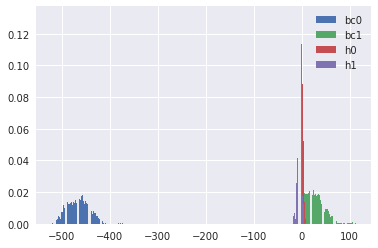

In [43]:
import matplotlib.pyplot as plt


for k in list(hist_bcs[0].keys())[200:201]:
    print(k)
    k = 'ALCD1'
    plt.bar(*zip(*sorted(hist_bcs[0][k].items(), key=lambda k:k[0])), label='bc0')
    plt.bar(*zip(*sorted(hist_bcs[1][k].items(), key=lambda k:k[0])), label='bc1')
    plt.bar(*zip(*sorted(hist_hs[0][k].items(), key=lambda k:k[0])), label='h0')
    plt.bar(*zip(*sorted(hist_hs[1][k].items(), key=lambda k:k[0])), label='h1')
    plt.legend()
    plt.show()

In [39]:
from sklearn.neighbors.kde import KernelDensity

for i in range(N):
    kde = KernelDensity().fit(df_bcs[i].round(1))
    kde = KernelDensity().fit(df_hs[i].round(1))

In [40]:
df_combined_h = pd.concat(df_hs)

ALATA_L
BC
[1.0, 0.32269999999999999]
mean: 0.66135


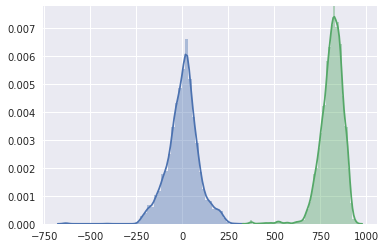

H
[0.44985000000000008, 0.44984999999999997]
mean: 0.44985


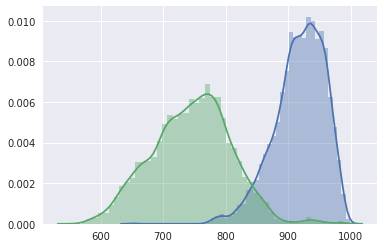

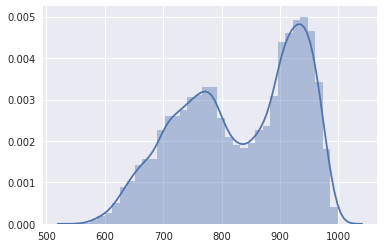

ALCD1
BC
[1.0, 0.87950000000000006]
mean: 0.93975


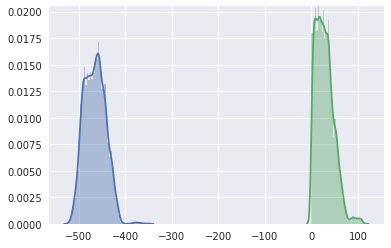

H
[0.14975000000000005, 0.14975000000000005]
mean: 0.14975


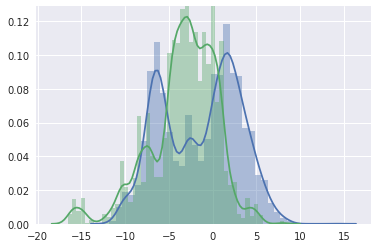

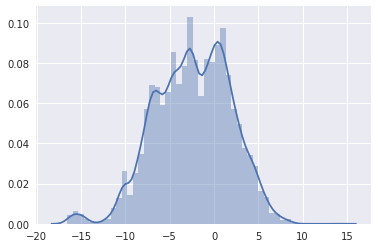

In [41]:
% matplotlib inline

import seaborn as sns
from scipy.stats import ks_2samp, kstest
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt

sns.set(color_codes=True)

for r in model.reactions[200:202]:
    print(r.id)
    
    try:
    
        print('BC')
        for i in range(N):
            bc = df_bcs[i][r.id].values
            sns.distplot(bc)
        bc_diff = [ks_2samp(df_combined_h[r.id].values, df_bcs[i][r.id].values)[0] for i in range(N)]
        print(bc_diff)
        print('mean:', np.mean(bc_diff))
        plt.show()

        print('H')
        for i in range(N):
            h = df_hs[i][r.id].values
            sns.distplot(h)
        h_diff = [ks_2samp(df_combined_h[r.id].values, df_hs[i][r.id].values)[0] for i in range(N)]
        print(h_diff)
        print('mean:', np.mean(h_diff))
        plt.show()

        sns.distplot(df_combined_h[r.id].values)
        plt.show()
        
    except Exception as e:
        print(e)
    
    # h_kde = KernelDensity(bandwidth=1).fit([[i] for i in df_combined_h[r.id].values])
    # sns.distplot(h_kde.sample(1000))
    # plt.show()
    
    # bc_kde = KernelDensity(bandwidth=1e-20).fit([[i] for i in bc])
    # 
    # print(ks_2samp(h_kde(10000), bc_kde(10000)))
    # print(kstest(h_kde, bc_kde), N=1000)

    # sns.distplot(bc_kde.sample(1000))
    # sns.distplot(h_kde.sample(1000))
    # plt.show()